






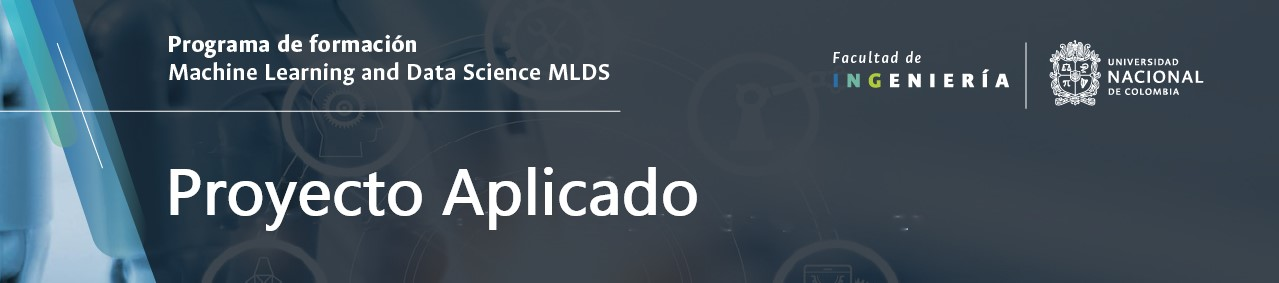

**Importar *librerías* a utilizar**

In [ ]:
!pip install mlflow==2.1.0 requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-n

In [ ]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=a7e8b676fd5c2119ae7e79a920c846356a262e31b15dc942fab6207eb56c4ed9
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
import sklearn
import mlflow

import warnings
from IPython.display import display

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
!python --version
!mlflow --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('missingno', msno.__version__)

Python 3.10.12
mlflow, version 2.1.0
Pandas 1.5.3
NumPy 1.22.4
Matplotlib 3.7.1
missingno 0.5.2


Este material fue realizado con las siguientes versiones:

- Python: 3.10.11
- pandas: 1.5.3
- NumPy: 1.22.4
- Matplotlib: 3.7.1
- Missingno: 0.5.2

Comenzamos creando una carpeta donde se guardarán todos los datos de MLFLow:

In [ ]:
!mkdir mlruns

mkdir: cannot create directory ‘mlruns’: File exists


Utilizaremos un servidor de `mlflow`:

In [ ]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command) #**TODO**: 27869

Utilizaremos `ngrok` para acceder al tablero de `mlflow`, agregaremos eltoken de `ngrok`:

In [ ]:
token = "2Qq0yQ3jeEari2OmOUpSAdAet9x_ufHEPwFWkVBE5Vctb9Jp" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

Nos autenticamos en ngrok:

In [ ]:
!ngrok authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Ahora, lanzamos la conexión con ngrok:

In [ ]:
from pyngrok import ngrok
ngrok.connect(5000, "http")

<NgrokTunnel: "https://723b-34-143-240-34.ngrok-free.app" -> "http://localhost:5000">

Especificamos que MLFlow debe usar el servidor que estamos manejando.

In [ ]:
mlflow.set_tracking_uri("http://localhost:5000")

In [ ]:
# Cargamos el archivo que contiene la información.

df = pd.read_excel('sample_data/KE30.xlsx',usecols=range(11))

In [ ]:
# Ruta del archivo
archivo = 'sample_data/KE30.xlsx'

# Tamaño del archivo en bytes
peso = os.path.getsize(archivo)

# Convertir el tamaño a megabytes
peso_mb = round(peso / (1024*1024),2)

print("El peso del archivo es:", peso_mb, "MB")

El peso del archivo es: 27.81 MB


Vamos a crear un experimento en MLFlow para este conjunto de datos:

In [ ]:
exp_id = mlflow.create_experiment(name="time_series", artifact_location="mlruns/")

Ahora, vamos a entrenar un modelo de red neuronal recurrente lstm desde `tensorflow`:

El entrenamiento de este modelo se realizará dentro de una run de MLFlow:

In [ ]:
run = mlflow.start_run(
    experiment_id = exp_id,
    run_name="time_series"
    )
print(run)

<ActiveRun: >


In [ ]:
# Entrenamiento del modelo

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping]
                    )

Epoch 1/100
1/3 [=========>....................] - ETA: 16s - loss: 0.1244
Epoch 1: val_loss improved from inf to 0.04144, saving model to best_model.h5
3/3 [==============================] - 9s 384ms/step - loss: 0.1528 - val_loss: 0.0414
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.1063
Epoch 2: val_loss improved from 0.04144 to 0.02114, saving model to best_model.h5
3/3 [==============================] - 0s 35ms/step - loss: 0.0986 - val_loss: 0.0211
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0937
Epoch 3: val_loss improved from 0.02114 to 0.01484, saving model to best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 0.0569 - val_loss: 0.0148
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0241
Epoch 4: val_loss did not improve from 0.01484
3/3 [==============================] - 0s 24ms/step - loss: 0.0390 - val_loss: 0.0266
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 0.

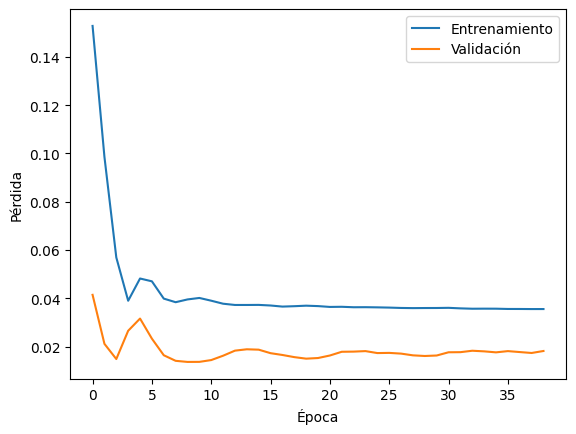

In [ ]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 1s 646ms/step
[[0.33711588]
 [0.35318652]
 [0.35988522]
 [0.3730411 ]
 [0.37812543]
 [0.3698807 ]
 [0.3674705 ]
 [0.3692978 ]
 [0.36191982]
 [0.35583675]
 [0.34825653]
 [0.34619537]]


In [ ]:
# Evaluar el modelo en el conjunto de prueba

mse = model.evaluate(X_test, y_test)
print("MSE:", mse)


1/1 [==============================] - 0s 24ms/step - loss: 0.0223
MSE: 0.022312693297863007


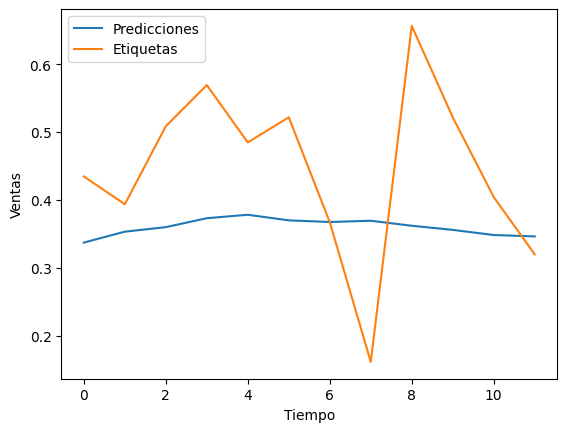

In [ ]:
# Graficar las predicciones y las etiquetas
plt.plot(y_pred.flatten(), label='Predicciones')
plt.plot(y_test.flatten(),label='Etiquetas')
plt.xlabel('Tiempo')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
# Métricas de rendimiento
# Error absoluto, cuadrado, y cuadrado logarítmico.
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

y_pred = model.predict(X_test)

y_test = np.reshape(y_test, (-1, 1))
y_pred = np.reshape(y_pred, (-1, 1))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")

1/1 [==============================] - 0s 22ms/step
Test Mean Squared Error: 	0.0223
Test Mean Absolute Error: 	0.1244
Test Mean squared log error: 	0.0110


In [ ]:
print(y_pred)

[[0.33711588]
 [0.35318652]
 [0.35988522]
 [0.3730411 ]
 [0.37812543]
 [0.3698807 ]
 [0.3674705 ]
 [0.3692978 ]
 [0.36191982]
 [0.35583675]
 [0.34825653]
 [0.34619537]]


In [ ]:
# Desnormalizar las predicciones y las etiquetas
y_pred = scaler.inverse_transform(y_pred.reshape(-1, n_meses))
y_test = scaler.inverse_transform(y_test.reshape(-1, n_meses))

Ahora vamos a registrar métricas de desempeño del modelo con la función `log_metrics`:

In [ ]:
mlflow.log_metrics({
    "Test Mean Squared Error": mean_squared_error(y_test, y_pred),
    "Test Mean Absolute Error": mean_absolute_error(y_test, y_pred),
    "Test Mean squared log error": mean_squared_log_error(y_test, y_pred)
    })

Vamos a almacenar el modelo desde `mlflow` con la función `log_model`

In [ ]:
mlflow.sklearn.log_model(model, "model")

2023/07/04 01:36:43 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp7iw_tqxy/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Por último, vamos a crear una gráfica de pérdida y a almacenarla:

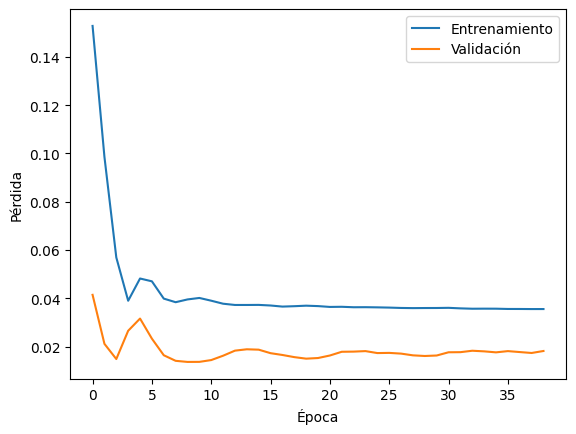

In [ ]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
fig.savefig("grafica_perdida.png")

Guardamos la imagen dentro del almacenamiento de MLFlow:

In [ ]:
mlflow.log_artifact("grafica_perdida.png", "grafica_perdida")

Finalmente, terminamos la ejecución:

In [ ]:
mlflow.end_run()

Desde el tablero de MLFlow podremos ver que ahora visualizamos este experimento:

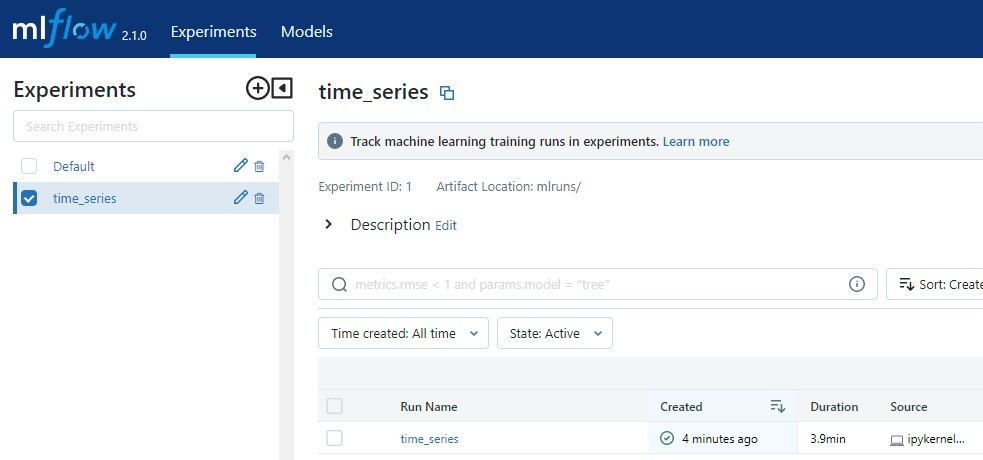

Por último, cargamos el modelo del registro de MLFlow de la siguiente forma:

In [ ]:
model = mlflow.pyfunc.load_model("models:/time_series/Production")
print(model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: baff176dc9ac40408a5894445bc6b6af



In [ ]:
features = [[75000, 20000,66000,100000,55000,98000]]
predictions = model.predict(features)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[1.8559753]]


In [ ]:
!git config --global user.email "sired89@hotmail.com"
!git config --global user.name "Ziiredd"
!git config --global init.defaultBranch master

In [ ]:
!git init

Initialized empty Git repository in /content/.git/
